<a href="https://www.kaggle.com/code/fermatsavant/ds-test?scriptVersionId=91597843" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from branca.element import Figure
import folium
#import the heatmap
from folium.plugins import HeatMap
from folium import plugins
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#Libraries
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#For work encode categorical atrubuts
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#For do a best a work flow
from sklearn.pipeline import Pipeline
#Missing values
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, average_precision_score

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/la-bikes-ds/tt_s.csv
/kaggle/input/la-bikes-ds/ts.csv


# Data science project

Data Mining steps:
* ### 1. Data collection
  *  #### 1.1 Trips database
  * #### 1.1 Stations database
* ### 2. Data cleanning
  + #### 2.1 [Handling Missing Entries](http://)
  
* ### 3. Exploratory Data Analyst (EDA)
* ### 4. Data preprocessing
 *  #### 4.1 Estandarization
 *  #### 4.2 Normalization
 *  #### 4.3 Discretization

Machine Learning steps:
* ### 5. Proposed Models for clasification
* ### 6. Evaluation Model 
* ### 7. Production Model

## 1. Data collection
### Trips database
short records of the Dataset

In [2]:
df_train = pd.read_csv(dirname + '/ts.csv', parse_dates=['start_time', 'end_time'], low_memory=False) # Standarizing date format and try using all the memory available
df_train

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,2017-09-17 17:51:00,2017-09-17 18:23:00,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,2019-09-22 11:27:00,2019-09-22 13:45:00,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,2020-01-31 17:11:00,2020-01-31 17:25:00,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,83666862,17,2018-04-25 18:32:00,2018-04-25 18:49:00,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,3032,4220
699996,132547303,9,2019-11-12 16:49:10,2019-11-12 16:58:51,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,3036,3014
699997,67332628,6,2018-01-13 15:49:00,2018-01-13 15:55:00,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,3032,3007
699998,114846232,3,2019-02-04 14:16:00,2019-02-04 14:19:00,34.045181,-118.250237,34.045540,-118.256668,12195,1.0,One Way,Walk-up,3067,3006


### Stations database

In [3]:
import requests
import pandas as pd
import json


auth_token = '3KwCK_4PBvQVw8DcabDbMRSjHQRbP'
data = { "query_string": 
        "SELECT * from \"savrgg/ds_test\".\"cat_station\" LIMIT 216" 
       }
head = {'Authorization': 'Bearer ' + auth_token}



response = requests.post("https://api.bit.io/api/v1beta/query/", json=data, headers=head)

There are only 100 records and in the database train we had more than 300 distinct stations

In [4]:
df_stats = pd.DataFrame(data=response.json()['data'], columns=response.json()['fields'])
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   addressstreet      100 non-null    object 
 1   addresscity        100 non-null    object 
 2   addressstate       100 non-null    object 
 3   addresszipcode     100 non-null    int64  
 4   bikesavailable     100 non-null    int64  
 5   closetime          100 non-null    object 
 6   docksavailable     100 non-null    int64  
 7   isvisible          100 non-null    bool   
 8   kioskid            100 non-null    int64  
 9   kioskpublicstatus  100 non-null    object 
 10  kioskstatus        100 non-null    object 
 11  name               100 non-null    object 
 12  timezone           100 non-null    object 
 13  totaldocks         100 non-null    int64  
 14  kiosktype          100 non-null    int64  
 15  latitude           100 non-null    float64
 16  longitude          100 non-

In [5]:
print("Station without bikes {}".format(df_stats[df_stats.bikesavailable == 0].shape[0]))
print("Station innactive or comming soon {}".format(df_stats[df_stats.kioskstatus != 'FullService'].shape[0]))

Station without bikes 4
Station innactive or comming soon 1


Histogram of kinds of status stations

<AxesSubplot:>

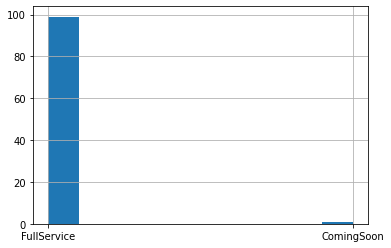

In [6]:
df_stats.kioskstatus.hist()

Brief description of each attribute in the dataset of stations

In [7]:
df_stats.describe()

,addresszipcode,bikesavailable,docksavailable,kioskid,totaldocks,kiosktype,latitude,longitude
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000
mean,90059.500000,6.010000,12.050000,3593.660000,18.190000,1.0,34.039298,-118.292145
std,102.842579,3.906728,5.525652,613.765332,6.006217,0.0,0.023926,0.076047
min,90004.000000,0.000000,0.000000,3005.000000,8.000000,1.0,33.973660,-118.491340
25%,90012.000000,3.000000,8.750000,3035.750000,15.000000,1.0,34.029520,-118.287470
50%,90015.000000,6.000000,12.000000,3076.500000,16.000000,1.0,34.043950,-118.263970
75%,90027.000000,7.250000,14.250000,4247.250000,21.000000,1.0,34.052172,-118.249773
max,90404.000000,21.000000,32.000000,4405.000000,36.000000,1.0,34.099050,-118.231280


# 2. Data cleaning
We can observe that there are some null values in our instances.
The trips were taken from 2016-2021

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              700000 non-null  int64         
 1   duration             700000 non-null  int64         
 2   start_time           700000 non-null  datetime64[ns]
 3   end_time             700000 non-null  datetime64[ns]
 4   start_lat            694437 non-null  float64       
 5   start_lon            694437 non-null  float64       
 6   end_lat              681426 non-null  float64       
 7   end_lon              681426 non-null  float64       
 8   bike_id              700000 non-null  object        
 9   plan_duration        699792 non-null  float64       
 10  trip_route_category  700000 non-null  object        
 11  passholder_type      697424 non-null  object        
 12  start_station        700000 non-null  int64         
 13  end_station   

### Handling Missing Entries

The missing values on column passholder_type will be going to estimate or imputed with value "Monthly Pass" because all the records had 30 entry in plan_duration column and statistically is not representative for the total entries, they are only 2576, the 3% of total entries. However, this imputation could create errors that may affect the results, for trying to reduce this possible problem will be going to create two train datasets and look if exist any affection to the algorithm with each one.


In [9]:
df_plandur = df_train[df_train['plan_duration'].isna()]
print("Number of records with nan value in plan_duration column: {}".format(df_plandur.shape[0]))
print("Number of records with Monthly Pass: {}".format(df_train[df_train['passholder_type'] == 'Monthly Pass'].shape[0]))
print("Porcentage of records with that plan: {}".format(round(208 / 394769, 5)))
df_train.dropna(subset=['plan_duration'], inplace=True)
print("New dimentions of the df: {}".format(df_train.shape))

Number of records with nan value in plan_duration column: 208
Number of records with Monthly Pass: 394769
Porcentage of records with that plan: 0.00053
New dimentions of the df: (699792, 14)


In [10]:
df_plandur = df_train[df_train['passholder_type'].isna()]
df_plandur['plan_duration'].unique()
print(df_plandur.shape[0])

2576


In [11]:
df_train_imp = df_train.copy()
df_train_imp['passholder_type'] = df_train['passholder_type'].replace(np.nan, 'Monthly Pass')
df_train.dropna(subset=['passholder_type'], inplace=True)
print("Dimension of dataset with imputation = {} and eliminated recording = {}".format(df_train_imp.shape, df_train.shape))

Dimension of dataset with imputation = (699792, 14) and eliminated recording = (697216, 14)


In [12]:
df_train[df_train['passholder_type'] == 'Monthly Pass'].groupby('plan_duration').count()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,passholder_type,start_station,end_station
plan_duration,,,,,,,,,,,,,
30.0,393823,393823,393823,393823,392098,392098,387850,387850,393823,393823,393823,393823,393823
150.0,160,160,160,160,160,160,156,156,160,160,160,160,160
365.0,578,578,578,578,575,575,481,481,578,578,578,578,578


## **EDA**

1. What happened with the "testing" pass holder type? There are only 78 rows with 999 of plan duration

2. Can we recognize if exist 2 types of trips, short and long trips with different distribution, applying a hierarchical clustering?

3. What happened with the distance? Can we create a new variable of distance in km using 2 points? (MongoDB or Arc map)

4. Can we check what is the reason for the longest trips? What happened with this? Long trips?, any stoppers? 

5. According to the duration plan, how many times the users can spend using the bike?

6. Are the data from deploy or production? Because we had records with testing label.


In [13]:
# and creating more columns for dates columns in Years, months, days and time.
def pp_date(df, col):
    aux_date = df_train[col].apply(lambda s: str(s).split('-'))
    aux = col.split('_')[0]
    df['{}_year'.format(aux)] = aux_date.apply(lambda s: int(s[0]))
    df['{}_month'.format(aux)] = aux_date.apply(lambda s: int(s[1]))
    df['{}_day'.format(aux)] = aux_date.apply(lambda s: int(s[2].split(' ')[0]))
    df['{}_hour'.format(aux)] =  aux_date.apply(lambda s: s[2].split(' ')[-1])
    return df.copy()
    


In [14]:
df_train = pp_date(df_train, col='start_time')
df_train = pp_date(df_train, col='end_time')

<AxesSubplot:>

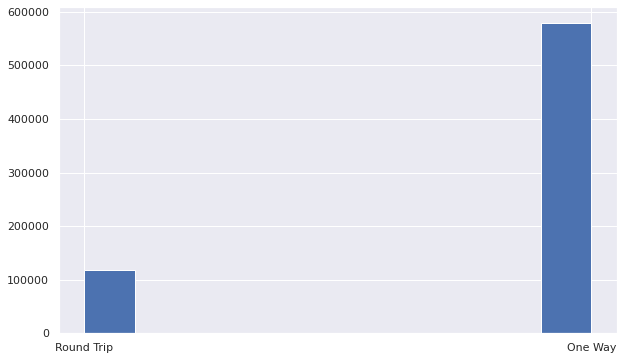

In [15]:
sns.set(rc={'figure.figsize':(10, 6)})
df_train['trip_route_category'].hist()

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'plan_duration'}>]], dtype=object)

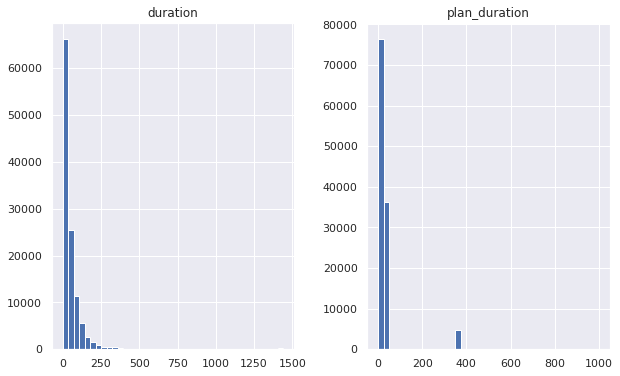

In [16]:
df_train[df_train['trip_route_category'] != 'One Way'].hist(column=['duration', 'plan_duration'], bins=40)

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'plan_duration'}>]], dtype=object)

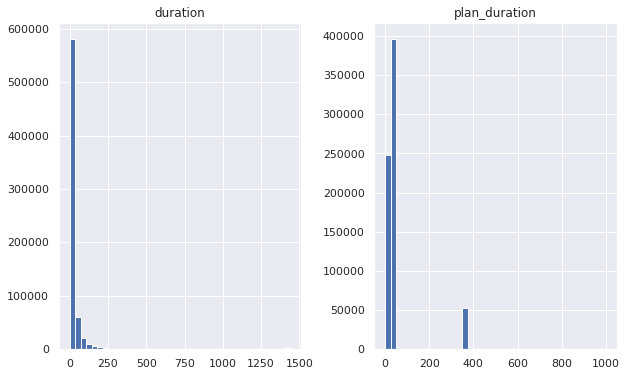

In [17]:
df_train.hist(column=['duration', 'plan_duration'], bins=40)

**As we can see, the duration trips has maybe 2 types, longest and shortest  trips.**

<AxesSubplot:>

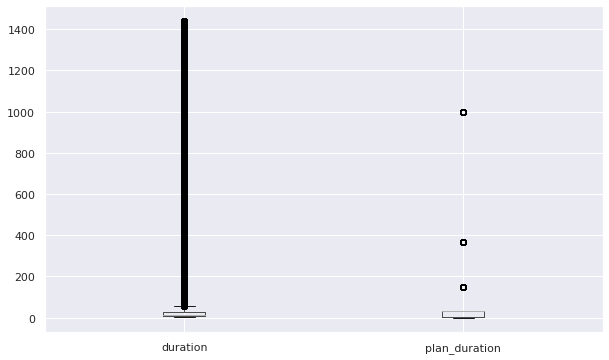

In [18]:
df_train.boxplot(column=['duration', 'plan_duration'])

In [19]:
df_train[df_train['plan_duration'] > 365][['duration', 'plan_duration', 'passholder_type']]

,duration,plan_duration,passholder_type
1652,1,999.0,Testing
21956,36,999.0,Testing
24398,1,999.0,Testing
48251,18,999.0,Testing
62890,33,999.0,Testing
...,...,...,...
634808,1,999.0,Testing
645829,3,999.0,Testing
669186,191,999.0,Testing
681559,1,999.0,Testing


In [20]:
df_train[df_train['passholder_type'] == 'Testing']

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,...,start_station,end_station,start_year,start_month,start_day,start_hour,end_year,end_month,end_day,end_hour
1652,125043104,1,2019-07-07 12:33:00,2019-07-07 12:34:00,NaN,NaN,NaN,NaN,16076,999.0,...,4285,4285,2019,7,7,12:33:00,2019,7,7,12:34:00
21956,135926924,36,2020-01-19 12:43:00,2020-01-19 13:19:00,NaN,NaN,NaN,NaN,15476,999.0,...,4285,4285,2020,1,19,12:43:00,2020,1,19,13:19:00
24398,132008969,1,2019-11-03 11:56:52,2019-11-03 11:57:16,33.984928,-118.469963,33.984928,-118.469963,15483,999.0,...,4347,4347,2019,11,3,11:56:52,2019,11,3,11:57:16
48251,129898045,18,2019-09-28 10:53:00,2019-09-28 11:11:00,34.150688,-118.366127,34.152000,-118.350601,15850,999.0,...,4418,4425,2019,9,28,10:53:00,2019,9,28,11:11:00
62890,129538183,33,2019-09-22 10:02:00,2019-09-22 10:35:00,33.997231,-118.445969,33.997231,-118.445969,15114,999.0,...,4333,4333,2019,9,22,10:02:00,2019,9,22,10:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634808,120468604,1,2019-04-29 15:39:00,2019-04-29 15:40:00,NaN,NaN,NaN,NaN,15274,999.0,...,3000,4285,2019,4,29,15:39:00,2019,4,29,15:40:00
645829,141329793,3,2020-04-25 13:05:00,2020-04-25 13:08:00,33.989700,-118.448883,33.989700,-118.448883,16009,999.0,...,4503,4503,2020,4,25,13:05:00,2020,4,25,13:08:00
669186,143856280,191,2020-06-20 14:01:00,2020-06-20 17:12:00,33.970242,-118.426071,33.970242,-118.426071,16061,999.0,...,4469,4469,2020,6,20,14:01:00,2020,6,20,17:12:00
681559,124293864,1,2019-06-25 18:39:00,2019-06-25 18:40:00,34.017368,-118.420601,34.017368,-118.420601,15735,999.0,...,4379,4379,2019,6,25,18:39:00,2019,6,25,18:40:00


In the next plots, we can observe the behavior usage of all stations is similar for end and start stations.

array([[<AxesSubplot:title={'center':'start_station'}>]], dtype=object)

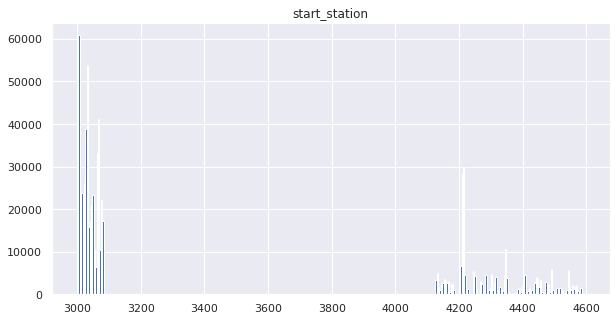

In [21]:
# Estations 
#len(df_train['start_station'].unique()), len(df_train['end_station'].unique())
sns.set(rc={'figure.figsize':(10, 5)})
df_train.hist(column=['start_station'], bins=364)

array([[<AxesSubplot:title={'center':'end_station'}>]], dtype=object)

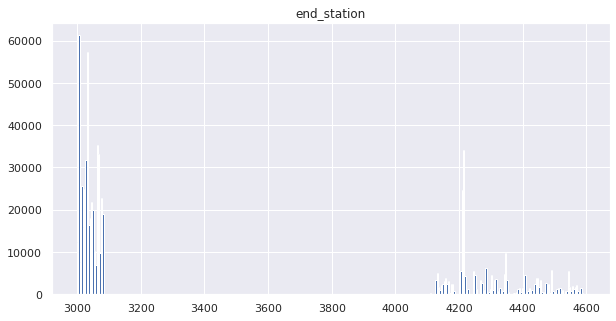

In [22]:
# Estations 
#len(df_train['start_station'].unique()), len(df_train['end_station'].unique())
sns.set(rc={'figure.figsize':(10, 5)})
df_train.hist(column=['end_station'], bins=364)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697216 entries, 0 to 699999
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              697216 non-null  int64         
 1   duration             697216 non-null  int64         
 2   start_time           697216 non-null  datetime64[ns]
 3   end_time             697216 non-null  datetime64[ns]
 4   start_lat            691668 non-null  float64       
 5   start_lon            691668 non-null  float64       
 6   end_lat              678741 non-null  float64       
 7   end_lon              678741 non-null  float64       
 8   bike_id              697216 non-null  object        
 9   plan_duration        697216 non-null  float64       
 10  trip_route_category  697216 non-null  object        
 11  passholder_type      697216 non-null  object        
 12  start_station        697216 non-null  int64         
 13  end_station   

In [24]:
df_dlat = df_train.groupby(df_train['start_station'])['start_lat'].mean().reset_index()
df_dlon = df_train.groupby(df_train['start_station'])['start_lon'].mean()
df_ddur = df_train.groupby(df_train['start_station']).count()['duration']#.reset_index()
df_stats = df_dlat.join(df_dlon, on='start_station')
df_stats.dropna(inplace=True)# For empty records
df_stations = df_stats.join(df_ddur, on='start_station')
df_stations.rename(columns={'duration': 'trip'}, inplace=True)
df_stations

,start_station,start_lat,start_lon,trip
0,3000,34.025853,-118.238215,1129
1,3005,34.048501,-118.258549,28374
2,3006,34.045540,-118.256668,12605
3,3007,34.050480,-118.254593,10763
4,3008,34.046612,-118.262733,9029
...,...,...,...,...
359,4583,33.976189,-118.418419,699
360,4584,34.094349,-118.326363,48
361,4587,34.060791,-118.309067,356
362,4593,34.020969,-118.335197,30


**The following map represents a heat map where are stations concentrated.**

In [25]:
df_dlat = df_train.groupby(df_train['start_station'])['start_lat'].mean().reset_index()
df_dlon = df_train.groupby(df_train['start_station'])['start_lon'].mean()
df_ddur = df_train.groupby(df_train['start_station']).count()['duration']#.reset_index()
df_stats = df_dlat.join(df_dlon, on='start_station')
df_stats.dropna(inplace=True)# For empty records
df_stations = df_stats.join(df_ddur, on='start_station')
df_stations.rename(columns={'duration': 'trip'}, inplace=True)

loc = df_stations[['start_lat', 'start_lon']].to_numpy()


def simple_folium(df:pd.DataFrame, lat_col:str, lon_col:str, text_cols:list, map_name:str):
    """
    Descrption
    ----------
        Returns a simple Folium HeatMap with Markers
    ----------
    Parameters
    ----------
        df : padnas DataFrame, required
            The DataFrane with the data to map
        lat_col : str, required
            The name of the column with latitude
        lon_col : str, required
            The name of the column with longitude
        test_cols: list, optional
            A list with the names of the columns to print for each marker

    """
    #Preprocess
    #Drop rows that do not have lat/lon
    df = df[df[lat_col].notnull() & df[lon_col].notnull()]

    # Convert lat/lon to (n, 2) nd-array format for heatmap
    # Then send to list
    df_locs = list(df[[lat_col, lon_col]].values)

    # Add the location name to the markers
    text_feature_list = list(zip(*[df[col] for col in text_cols]))
    text_formated = []
    for text in text_feature_list:
        text = [str(feat) for feat in text]
        text_formated.append("<br>".join(text))
    marker_info = text_formated

    #Set up folium map
    fol_map = folium.Map([34.1, -118.25], zoom_start=12)

    # plot heatmap
    heat_map = plugins.HeatMap(df_locs, name=map_name)
    fol_map.add_child(heat_map)

    # plot markers
    markers = plugins.MarkerCluster(locations = df_locs, popups = marker_info, name="Testing Site")
    fol_map.add_child(markers)

    #Add Layer Control
    folium.LayerControl().add_to(fol_map)

    return fol_map

simple_folium(df_stations, "start_lat", "start_lon", ['trip'],  "COVID Testing Sites")

**The following map shows an intensity of color, (where blue are low demand and red are high demand) 
for each station, where are the most service demand**

In [26]:
map = folium.Map(location = [34.1,-118.25], zoom_start = 12)
heat_data = [[row.start_lat, row.start_lon, row.trip] for i, row in df_stations.iterrows() ]
plugins.HeatMap(heat_data).add_to(map)
folium.LayerControl().add_to(map)
map

In [27]:
#df_stations['start_station'].unique()
#df_stations

df_train.groupby(df_train['start_station']).count()['duration'].reset_index().sort_values(by='duration', ascending=False)

,start_station,duration
1,3005,28374
22,3030,20250
9,3014,18719
122,4214,17463
23,3031,17021
...,...,...
208,4395,5
191,4369,5
193,4373,3
161,4327,1


In [28]:
df_train['passholder_type'].unique()

array(['Walk-up', 'Monthly Pass', 'One Day Pass', 'Annual Pass',
       'Flex Pass', 'Testing'], dtype=object)

The following plot shows the stationary of daily duration trips using a sample of 10%

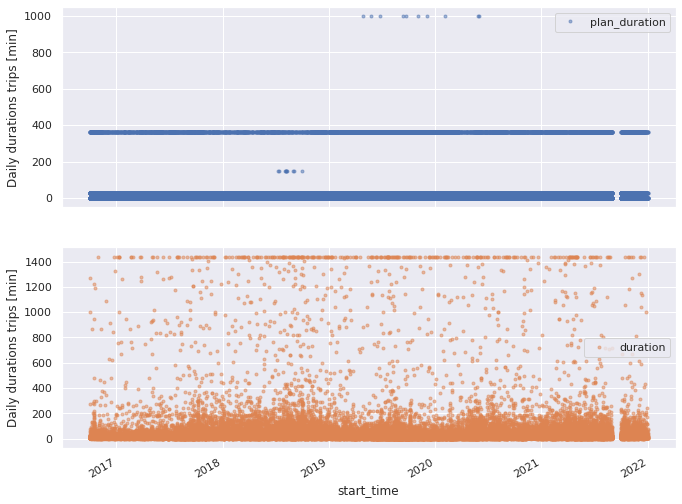

In [29]:
df_s10 = df_train.set_index('start_time').sample(int(df_train.shape[0] * .1), random_state=1024)
cols_plot = ['plan_duration', 'duration']
axes = df_s10[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily durations trips [min]')

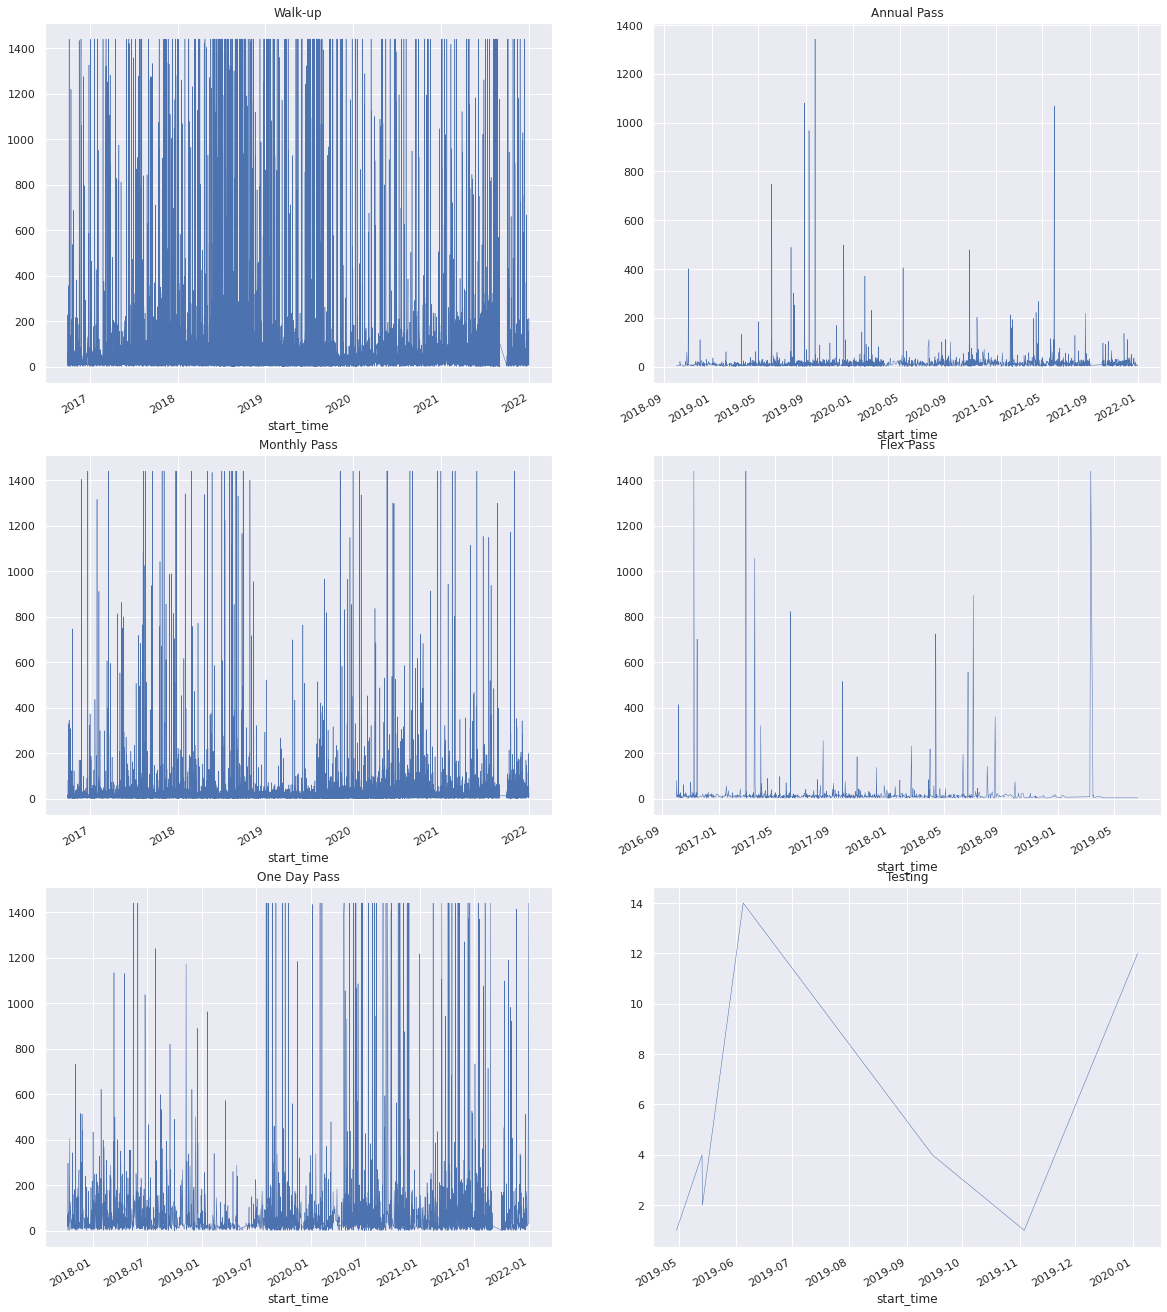

In [30]:
# Hours

sns.set(rc={'figure.figsize':(20, 25)})
fig, axes = plt.subplots(nrows=3, ncols=2)

types = df_train['passholder_type'].unique()
n = len(types)
for p in range(n):
    plan = types[p]
    df_aux = df_train[df_train['passholder_type'] == plan]
    df = df_aux.set_index('start_time').sample(int(df_aux.shape[0] * .1), random_state=1024)
    if p < 3:
        df['duration'].plot(linewidth=0.5, ax=axes[p, 0], title=plan)      
    else:
        df['duration'].plot(linewidth=0.5, ax=axes[p-3, 1], title=plan)

what is the average duration trip for each hour


<AxesSubplot:xlabel='start_time'>

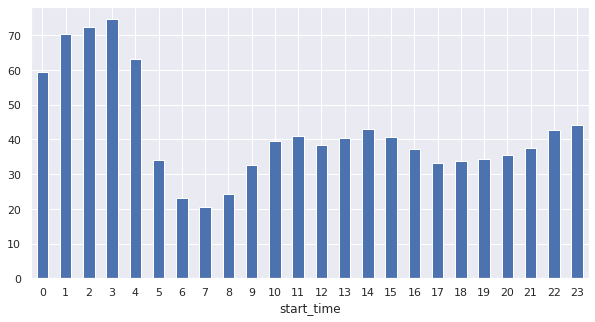

In [31]:
# what is the average duration trip for each hour
sns.set(rc={'figure.figsize':(10, 5)})
df_train.groupby(df_train['start_time'].dt.hour)['duration'].mean().plot(kind='bar', rot=0)

Behavior of number of trips over time 

<AxesSubplot:xlabel='year'>

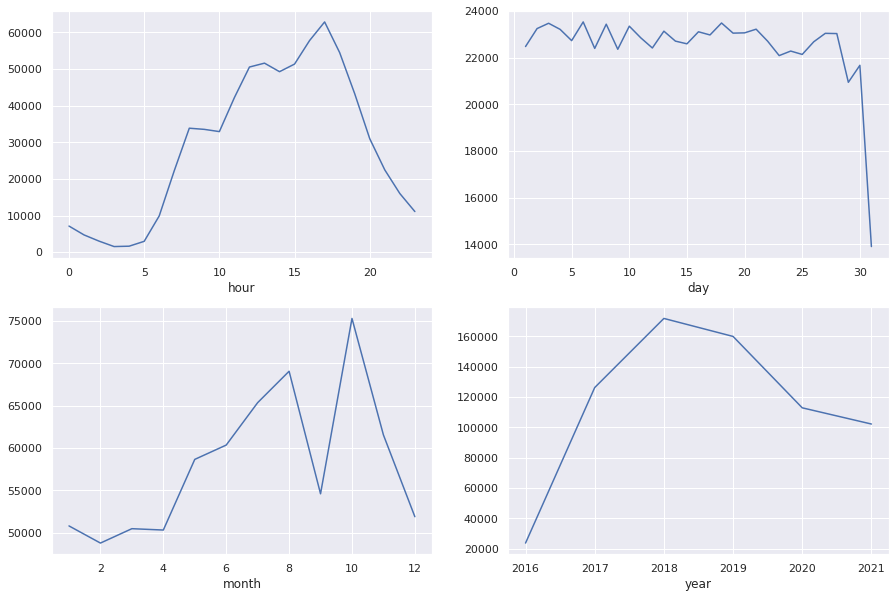

In [32]:
sns.set(rc={'figure.figsize':(15, 10)})
fig, axes = plt.subplots(nrows=2, ncols=2)
df_train.groupby(df_train['start_time'].dt.hour).count()['start_hour'].plot(ax=axes[0, 0], xlabel='hour')
df_train.groupby(df_train['start_time'].dt.day).count()['start_hour'].plot(ax=axes[0, 1], xlabel='day')
df_train.groupby(df_train['start_time'].dt.month).count()['start_hour'].plot(ax=axes[1, 0], xlabel='month')
df_train.groupby(df_train['start_time'].dt.year).count()['start_hour'].plot(ax=axes[1, 1], xlabel='year')

Behavior number of trips over time by each kind of passholder

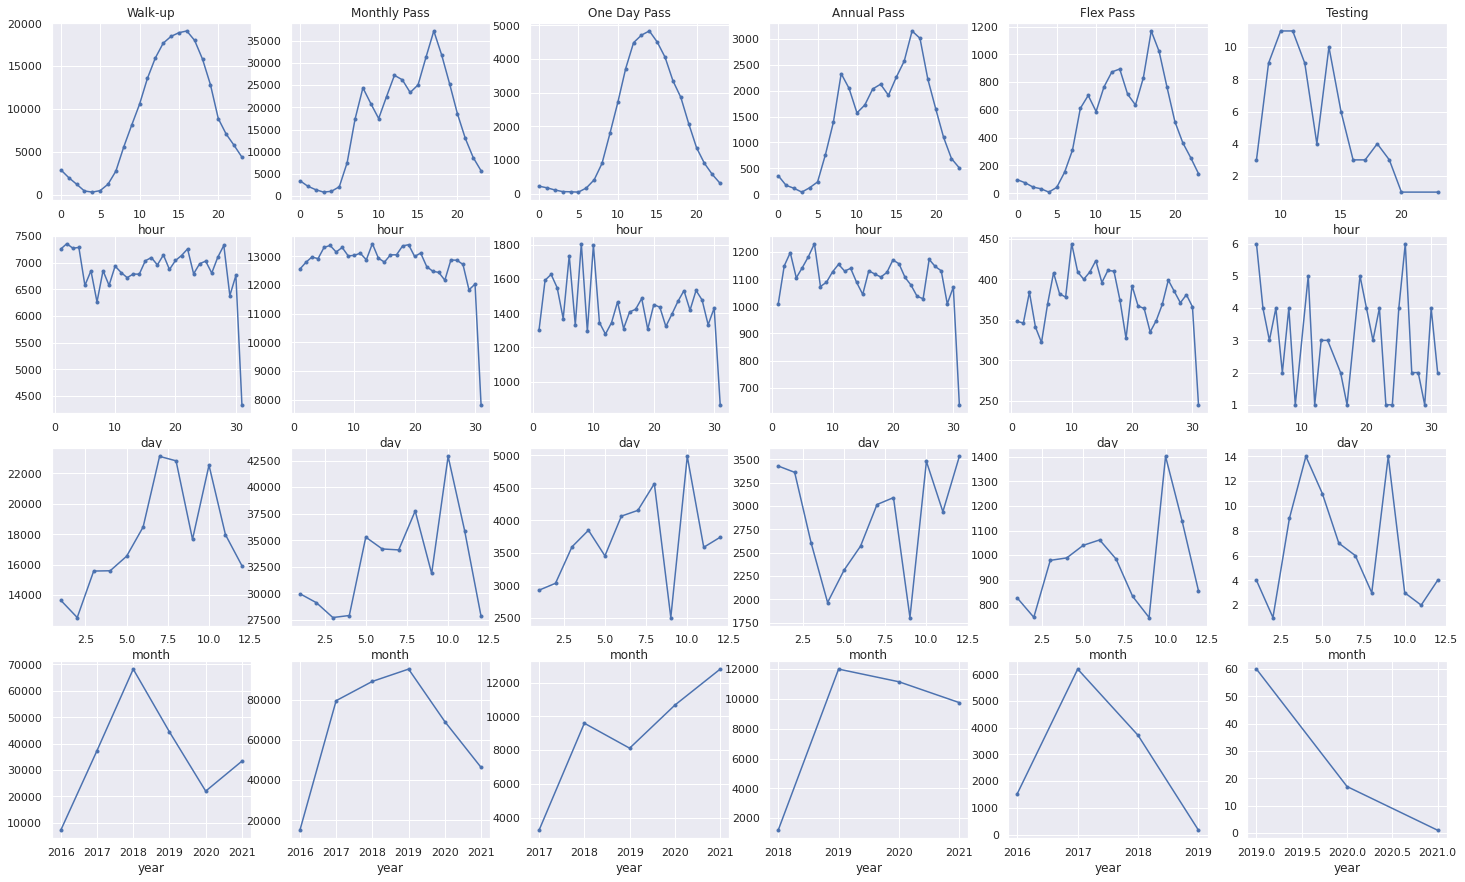

In [33]:
sns.set(rc={'figure.figsize':(25, 15)})
fig, axes = plt.subplots(nrows=4, ncols=n)

n = len(types)
for p in range(n):
    df = df_train[df_train['passholder_type'] == types[p]]
    df.groupby(df['start_time'].dt.hour).count()['start_hour'].plot(marker='.', ax=axes[0, p], xlabel='hour', title=types[p])
    df.groupby(df['start_time'].dt.day).count()['start_hour'].plot(marker='.', ax=axes[1, p], xlabel='day')
    df.groupby(df['start_time'].dt.month).count()['start_hour'].plot(marker='.', ax=axes[2, p], xlabel='month')
    df.groupby(df['start_time'].dt.year).count()['start_hour'].plot(marker='.', ax=axes[3, p], xlabel='year')

**the trend of bike-sharing is on the rise**

<AxesSubplot:xlabel='year'>

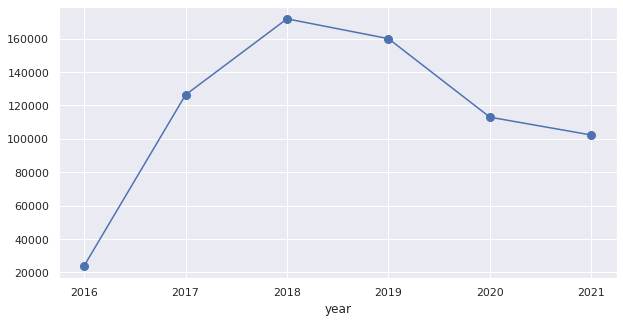

In [34]:
sns.set(rc={'figure.figsize':(10, 5)})
df = df_train.set_index('start_time').sample(int(df_train.shape[0] * 1), random_state=1024)
df['start_time'] = df_train['start_time'].to_list()
df.groupby(df['start_time'].dt.year).count()['start_time'].plot(marker='o', rot=0, markersize=8, linestyle='-', xlabel='year', title='', label='N° of travels per year')

In [35]:
!pip install mplcursors

     |████████████████████████████████| 88 kB 709 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for mplcursors: filename=mplcursors-0.5.1-py3-none-any.whl size=20810 sha256=256b789f3eaeda8c168b57d1e816306b9845df12b182a5d2cc9deda97f368d5e
  Stored in directory: /root/.cache/pip/wheels/ae/cd/13/09fe660e3e9d392c7e9b46f202369cd9c2b8dddfb47d5950ef
Successfully built mplcursors


In [36]:
df.groupby(pd.Grouper(freq="D")).count()['start_time'].sort_values(ascending=False)

start_time
2018-09-30    1361
2019-10-06    1268
2017-10-08    1224
2018-12-02     939
2021-10-10     874
              ... 
2021-09-16       0
2021-09-15       0
2021-09-13       0
2021-09-12       0
2021-09-20       0
Name: start_time, Length: 1918, dtype: int64

Time serie of the number of daily trips

<AxesSubplot:xlabel='year'>

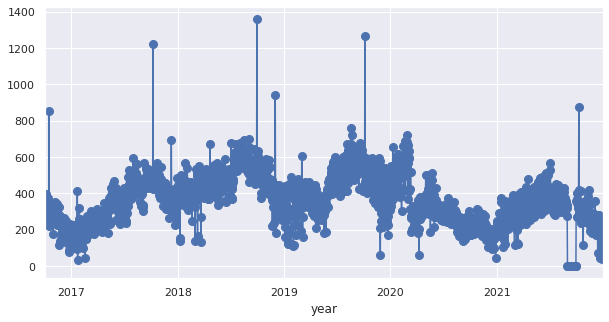

In [37]:
df.groupby(pd.Grouper(freq="D")).count()['start_time'].plot(marker='o', rot=0, markersize=8, linestyle='-', xlabel='year', title='', label='N° of travels per year')


Time serie of the number of monthly trips

<AxesSubplot:xlabel='year'>

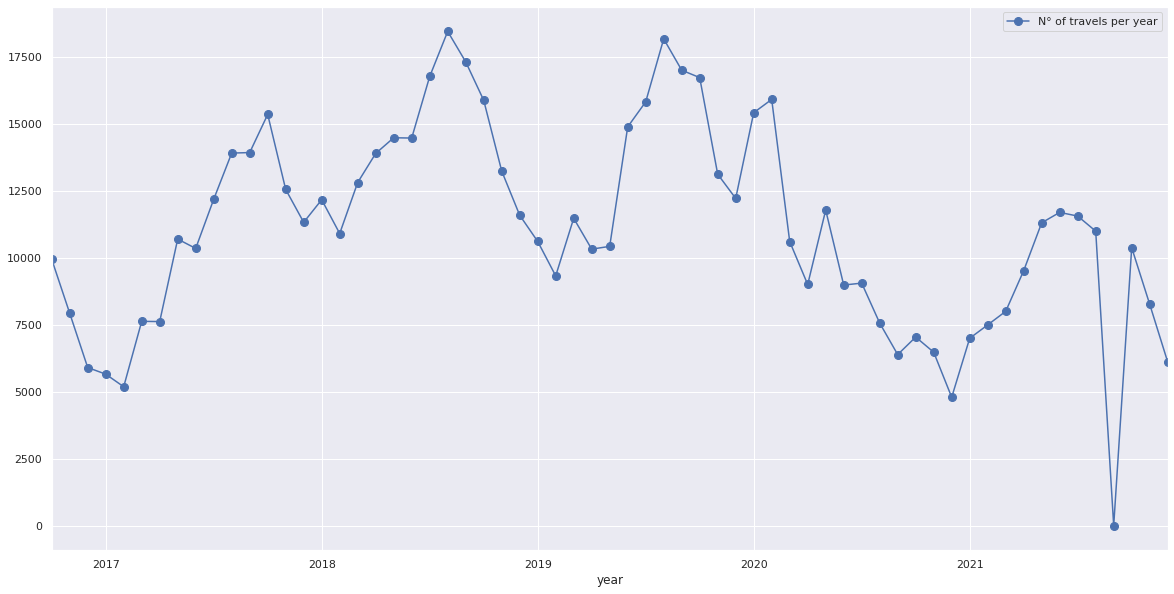

In [38]:
sns.set(rc={'figure.figsize':(20, 10)})
df_ts = df.groupby(pd.Grouper(freq="M")).count()[['start_time']]
df_ts.rename(columns={'start_time': 'number_trips'}, inplace=True)
df_ts['number_trips'].plot(marker='o', rot=0, markersize=8, linestyle='-', xlabel='year', title='', label='N° of travels per year', legend=True)

Looking at this graph, we can see that there is a high demand due to the seasonality of the service during the months of July, August, September and October during the period 2017-2021, except in 2020 due to the pandemic period.
It is very important to highlight that during the whole pandemic year, from March to December 2020, the demand goes down, and during 2021, the service goes up, but during the months of January and February there is not much demand, so it is expected to increase until June-July 2022.


## Decomposition Time Series
In seasonal decompose we have to set the model. We can either set the model to be Additive or Multiplicative. The rule of thumb for selecting the right model is to see in our plot if the trend and seasonal variation are relatively constant over time, in other words, linear. If yes, then we will select the Additive model. Otherwise, how happend in our case, the trend and seasonal variation increase or decrease over time then we use the **Multiplicative model**.
Our data here are aggregated by month. The period we want to analyze is by year so that's why we set the period to 12.

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_ts = df_ts[df_ts['number_trips'] != 0]
result = seasonal_decompose(df_ts['number_trips'], model='multiplicable', period=12)

The decomposition helps us find the trend automatically, so with this analysis we can notice that the trend is going to an inflection point or in a stagnation for the next months and maybe the expectation of increase will be in the seasonality of maximum demand during July-September 2022.

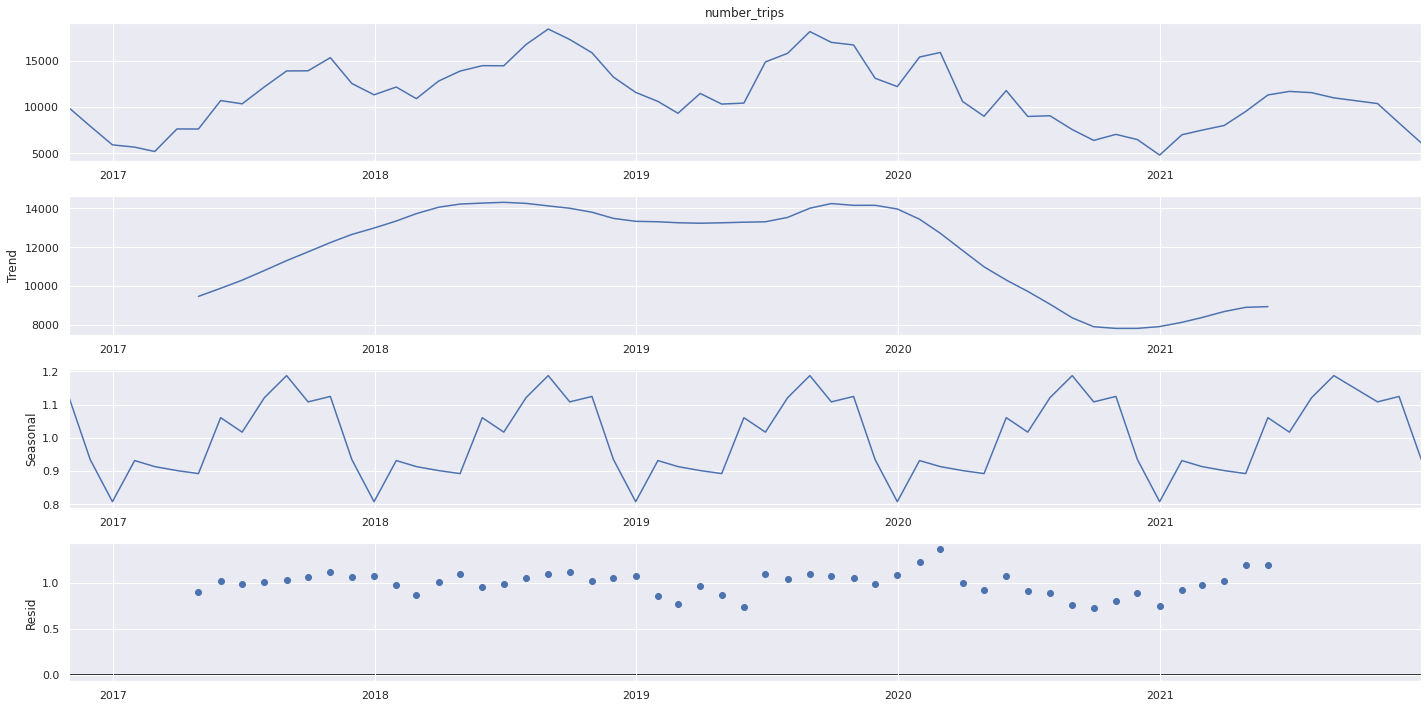

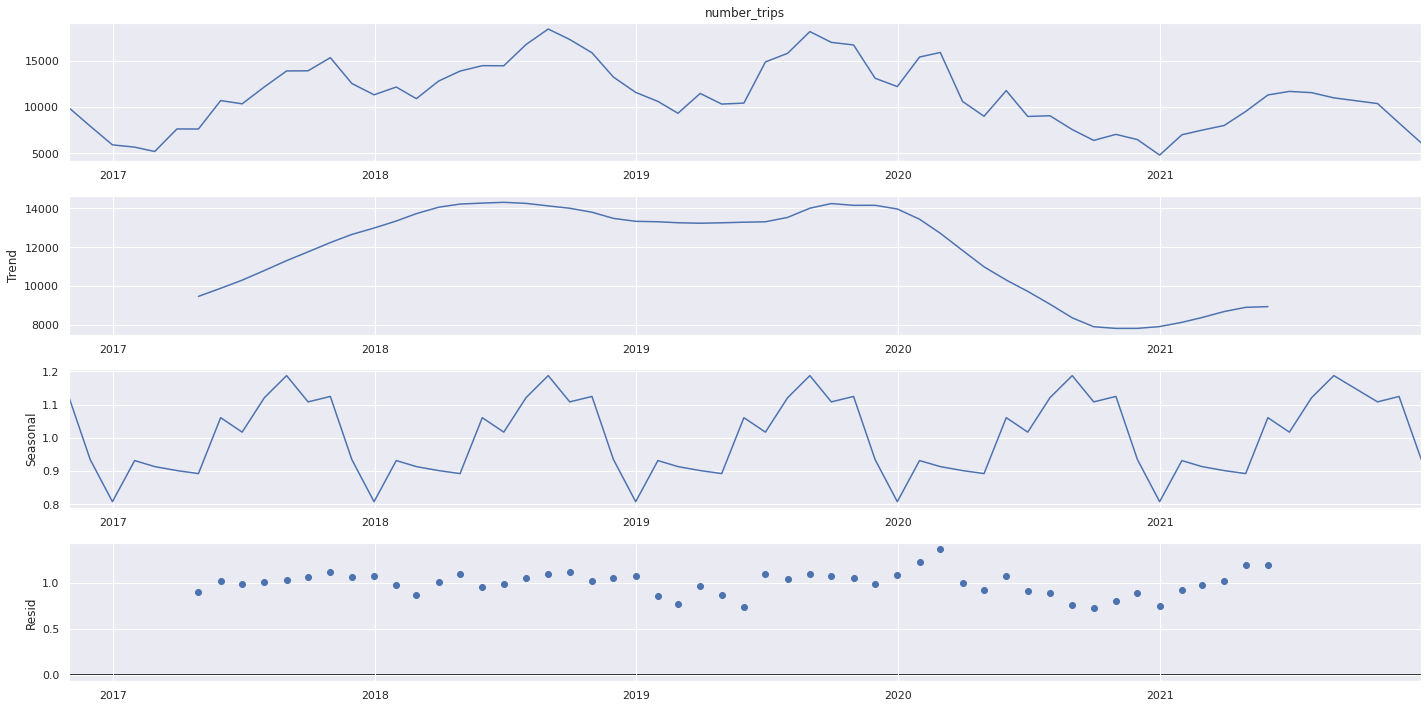

In [40]:
result.plot()

For the next scenario, we need to focus on the annual pass rate, as this rate is expected to increase over the next few months.

With the decomposition analysis we can notice that the trend of the annual pass rate is going to a stagnation for the next months.

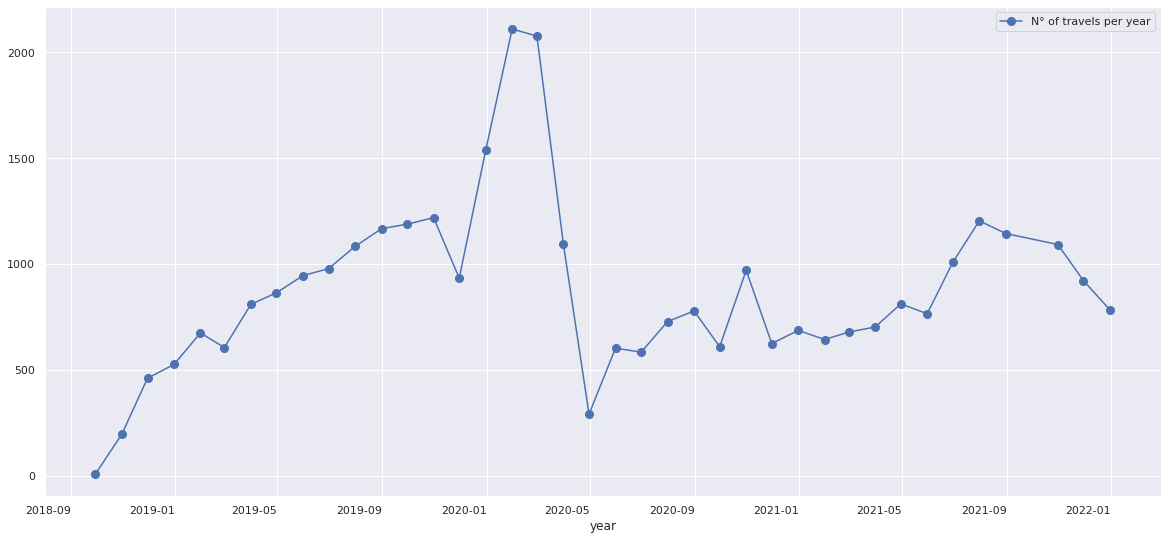

In [41]:
sns.set(rc={'figure.figsize':(20, 10)})
df = df_train.set_index('start_time').sample(int(df_train.shape[0] * 1), random_state=1024)
df['start_time'] = df_train['start_time'].to_list()
df_ap = df[df['passholder_type'] == 'Annual Pass']

df_ts = df_ap.groupby(pd.Grouper(freq="M")).count()[['start_time']]
df_ts.rename(columns={'start_time': 'number_trips'}, inplace=True)
df_ts = df_ts[df_ts['number_trips'] != 0]
df_ts['number_trips'].plot(marker='o', rot=0, markersize=8, linestyle='-', xlabel='year', title='', label='N° of travels per year', legend=True)

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_ts['number_trips'], model='multiplicable', period=12)

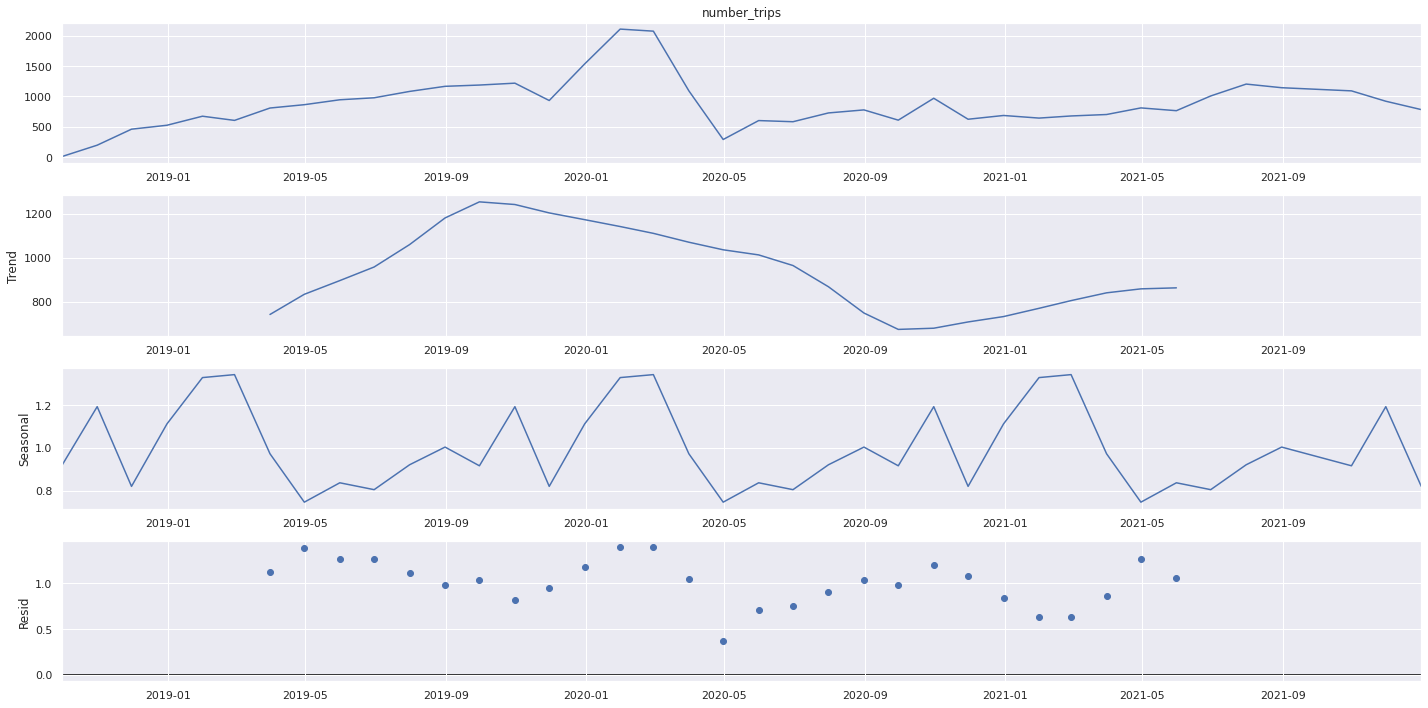

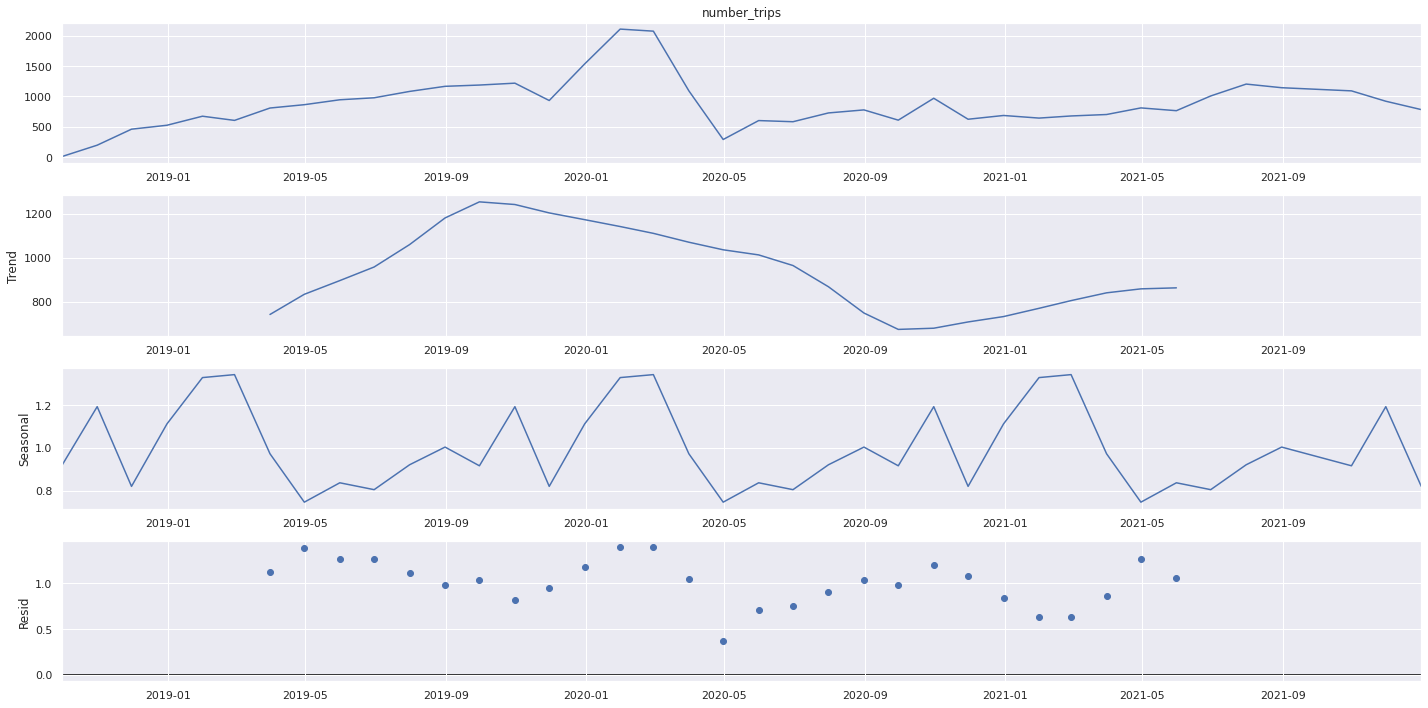

In [42]:
result.plot()

In [43]:
# Feature Enginnering
df= df_train[[#'trip_id', 
    'duration',# 'start_time', 'end_time', 'start_lat',
       #'start_lon', 'end_lat', 'end_lon', 'bike_id',
       'trip_route_category'#, 'passholder_type', 
    #'start_station',
       #'end_station', 'start_year', 'start_month', 'start_day', 'start_hour',
       #'end_year', 'end_month', 'end_day', 'end_hour'
]]
y = df_train['passholder_type']

# 4. Data Preprocessing 

In [44]:
def norm(df):
    num_attribs = df.select_dtypes(exclude=['object', 'category']).columns
    cat_attribs = df.select_dtypes(include=['object', 'category']).columns

    full_pipeline = ColumnTransformer([
        ("num", MinMaxScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ])

    X = full_pipeline.fit_transform(df)
    print(X.shape)#, y.shape)+
    return X

X = norm(df)
X

(697216, 3)


array([[0.02362752, 0.        , 1.        ],
       [0.02154274, 1.        , 0.        ],
       [0.00347464, 1.        , 0.        ],
       ...,
       [0.00347464, 1.        , 0.        ],
       [0.00138985, 1.        , 0.        ],
       [0.04030577, 1.        , 0.        ]])

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(627494, 3) (69722, 3) (627494,) (69722,)


# 5. Proposed Models

Decision  Tree

In [46]:
#param_grid = {'max_features': ['auto'],
#              'ccp_alpha': [0.0001],
#              'max_depth' : [3, 4, 5],
#              'criterion' : ['entropy']
#             }
#tree_clas = DecisionTreeClassifier(random_state=1024)
#grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
#grid_search.fit(x_train, y_train)
#final_model = grid_search.best_estimator_
#print(final_model)

#Training the model
tree_clas = DecisionTreeClassifier(ccp_alpha=0.0001, class_weight=None,
                                    criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=1024, splitter='best')
tree_clas.fit(x_train, y_train)

y_predict = tree_clas.predict(x_test)
print("confusion matrix \n %s" %(confusion_matrix(y_test, y_predict)))
print("precision %s"%(accuracy_score(y_test, y_predict)))

confusion matrix 
 [[    0     0  3145     0     0   189]
 [    0     0  1152     0     0    83]
 [    0     0 36371     0     0  3113]
 [    0     0  2189     0     0  2257]
 [    0     0    10     0     0     1]
 [    0     0 11160     0     0 10052]]
precision 0.6658300106135796


Support Vector Machine

In [47]:

#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf.fit(x_train, y_train)

#y_predict = clf.predict(x_test)
#print("confusion matrix \n %s" %(confusion_matrix(y_test, y_predict)))
#print("precision %s"%(accuracy_score(y_test, y_predict)))

Logistic Regression

In [48]:

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)
print("confusion matrix \n %s" %(confusion_matrix(y_test, y_predict)))
print("precision %s"%(accuracy_score(y_test, y_predict)))

confusion matrix 
 [[    0     0  3070     0     0   264]
 [    0     0  1152     0     0    83]
 [    0     0 35576     0     0  3908]
 [    0     0  2705     0     0  1741]
 [    0     0     5     0     0     6]
 [    0     0 13526     0     0  7686]]
precision 0.6204928143197269


# 6. Evaluation Model

Random Forest

In [49]:
#param_grid = {'ccp_alpha': [0.00001, 0.0001],
#              'max_depth' : [5, 6],
#              'criterion' : ['entropy'],
#              'max_features' : ['auto']
#             } 
#clf = RandomForestClassifier(random_state=1024)
#grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=True)
#grid_search.fit(x_train, y_train)
#final_model = grid_search.best_estimator_
#final_model

clf = RandomForestClassifier(ccp_alpha=0.00001, criterion='entropy', max_depth=6,
                       random_state=1024)
clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)
print("confusion matrix \n %s" %(confusion_matrix(y_test, y_predict)))
print("precision %s"%(accuracy_score(y_test, y_predict)))

confusion matrix 
 [[    0     0  3158     0     0   176]
 [    0     0  1158     0     0    77]
 [    0     0 36533     0     0  2951]
 [    0     0  2213     0     0  2233]
 [    0     0    10     0     0     1]
 [    0     0 11339     0     0  9873]]
precision 0.6655861851352515


Generating submission

In [50]:
df_test = pd.read_csv(dirname + '/tt_s.csv')
df = df_test[['duration', 'trip_route_category']]
X = norm(df)
y_predict = tree_clas.predict(X)

submission = pd.DataFrame()
submission['trip_id'] = df_test.trip_id
submission['passholder_type'] = y_predict
submission.to_csv('submission.csv', index=None)
submission


(569886, 3)


,trip_id,passholder_type
0,17059130,Monthly Pass
1,17059129,Monthly Pass
2,17059126,Monthly Pass
3,17059125,Monthly Pass
4,17061379,Walk-up
...,...,...
569881,179408277,Monthly Pass
569882,179408276,Monthly Pass
569883,179409877,Walk-up
569884,179409876,Walk-up


The two variables with it was determined to train the model are the ones that are believed to help improve the model prediction, since the others are of date type, id's and locations, so it is believed that they would only contribute noise to the model.

Given the 66% of acc of the model, it is believed that it is a good result, due to the fact that it has a quite notorious class unbalance, and that it overcame the most naive case of sending everything from the majority class. 

It is still possible to improve this model by adding more variables such as trip distance, a combination of distance and duration, creating another categorical variable generated by a clustering algorithm to determine the type of trip, whether it is long, short or an average trip, with a scale of 1-3, or 1-5, that number wil be determined by the clustering model.

In [51]:
df_test.shape

(569886, 12)

# 7. Production Model

Before putting the model into production, the following questions need to be answered:

1. what has happened to the "testing" pass holder type? There are only 78 rows with 999 plan duration.

2. Can we recognize if there are 2 types of trips, short and long with different distribution, by applying hierarchical clustering?

3. What about distance, can we create a new distance variable in km using 2 points? (MongoDB or Arc map)

4. Can we check what is the reason for the longest trips, what happened to this, the longest trips, any stopper? 

5. According to the duration plan, how many times can users spend using the bike?

6. Is the data deployment or production data? Because we had records with test label.

7. What happend with the stations that aren't in the API?

Verify if they are productive data, if not get them, see if we can create new variables from the data as assign a new category, short and long trips, see what happens with the distance, if we can calculate it from the two given points or if there is a tracking of the route that the user makes through a GPS, among other points, it is also necessary to pass this notebook to a script that uses pipelines for each of the processes, of course not without doing more engineering of attributes, ie,  adding and creating more variables, importing the trained model to a format that allows recurrent use (joblib) and that is training and evaluating itself from time to time with new data, where will be located (persistent hard disk or cloud), etc...

Steps for production:
1. Trying to resolve all the possible questions.
2. Feature Engineering
3. Trying other models and determine the better using other metrics as AUC, PR Curve, F_score, etc.
4. Create procces using a script Pipeline.
5. Determinate the host for runing the process.
6. Create a dataflow for automatically adapting to change:

    6.1 Train model
    
    6.2 Evaluate solution
    
    6.3 Launch
    
    6.4 Update Data
    
    6.5 Repeat step 6.1
